In [1]:
import numpy as np 
import cv2

import matplotlib.pyplot as plt
from thomas_detector import *
from vision import *

Using cache found in C:\Users\Thomas/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


In [2]:
vision = VisionMatcher('../done_exploded_colored2.jpg')

In [3]:
detector = ThomasDetector()

22


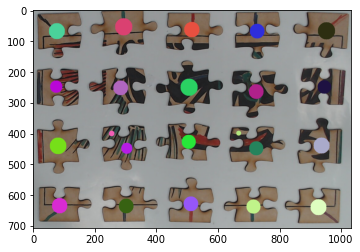

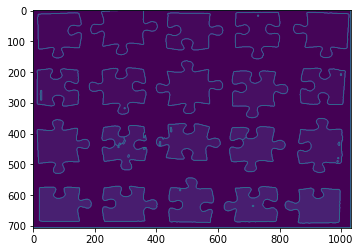

In [4]:
done = cv2.imread('../done_exploded_colored2.jpg')
done = cv2.cvtColor(done, cv2.COLOR_BGR2RGB)
img, markers = detector.process(done)
print(len(detector.pieces))
plt.imshow(img)
plt.show()
plt.imshow(markers)
plt.show()

24


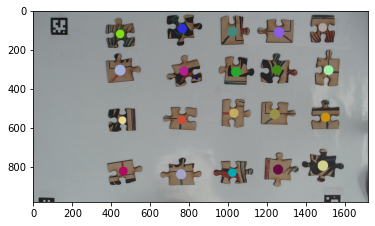

In [5]:
scrambled = cv2.imread('../vision/train_imgs/g4 (1).jpg')[:-100,200:,:]
scrambled = cv2.cvtColor(scrambled, cv2.COLOR_BGR2RGB)
img, markers = detector.process(scrambled)
print(len(detector.pieces))
plt.imshow(img)

In [6]:
loc, scores = vision.match_all(detector.pieces)
print(scores)

[19.66647269 17.02258636 13.9965835  23.38155897 23.80366069         inf
 16.63509171 18.18553943 18.67756653 11.88168824 38.37192854         inf
 16.51192544 12.02343046 13.28380358 22.92079498 48.91113905 26.86425628
 20.45547521 23.80725839 24.6224043  16.66108206         inf         inf]


19.666472692789252
17.022586355875355
13.996583498608544
23.38155896733216
23.80366068960548
16.635091708283518
18.18553942950994
18.677566533112646
11.881688240018235
38.371928543422456
16.51192544417285
12.023430459858371
13.283803575190426
22.9207949758178
48.911139047048685
26.864256275705365
20.45547521143881
23.8072583925088
24.62240430481901
16.66108205876443


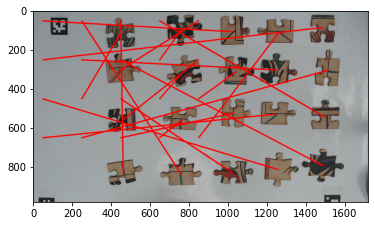

In [7]:
img = cv2.imread('../vision/train_imgs/g4 (1).jpg')[:-100,200:,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rejects = []
for i, (piece, xy) in enumerate(zip(detector.pieces, loc)):
    if scores[i] < 999999 and scores[i] != 0.0:
        print(scores[i])
        img = cv2.line(img, (piece.x, piece.y), tuple(xy.astype(int)*200 + 50), (255, 0, 0), 5)
    else:
        rejects.append(piece)
plt.imshow(img)

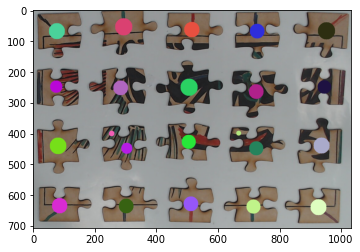

In [8]:
plt.imshow(done)

In [7]:
print(scores[16])
print(loc[16])
print(scores[14])
print(loc[14])

inf
[0. 0.]
inf
[0. 0.]


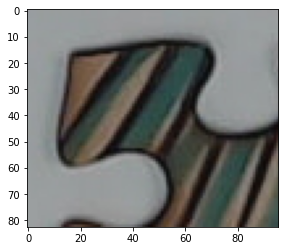

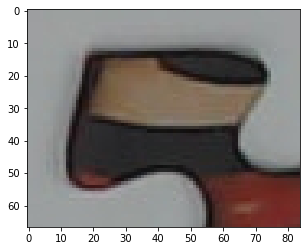

In [8]:
for piece in rejects:
    plt.imshow(piece.natural_img)
    plt.show()

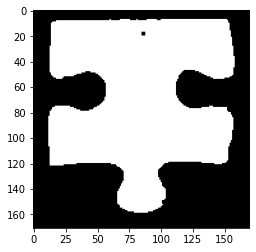

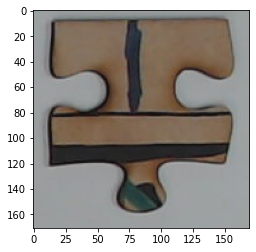

In [7]:
plt.imshow(detector.pieces[1].img, cmap='gray')
plt.show()
plt.imshow(detector.pieces[1].natural_img)

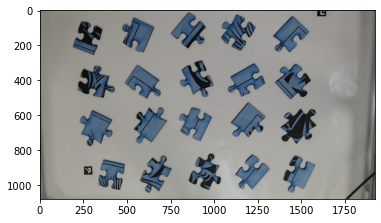

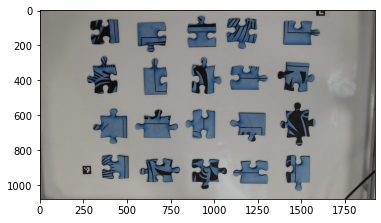

In [34]:
query = cv2.imread('./train_imgs/g1 (1).jpg')          # queryImage
match = cv2.imread('./train_imgs/g1 (2).jpg') # trainImage
plt.imshow(query)
plt.show()
plt.imshow(match)